* https://cloud.google.com/vision/docs/

First enable the your API key to use Cloud Vision - will have to setup a billing account.

Follow the instructions on https://cloud.google.com/docs/authentication/getting-started to download your API key, which is a .json file. The path to this file is saved to the environment variable GOOGLE_APPLICATION_CREDENTIALS which in my case was set with 

```
$ export GOOGLE_APPLICATION_CREDENTIALS=/Users/robincole/Documents/Google_API_key.json
```

You can also manually point to the key file, which is done here

In [ ]:
#!pip3 install --upgrade google-cloud

In [ ]:
#!pip install --upgrade google-cloud-vision

In [ ]:
#!pip install --upgrade google-oauth

In [4]:
import io
import os
import json
import matplotlib.pyplot as plt
%matplotlib inline

# Imports the Google Cloud client library
from google.cloud import vision
from google.cloud.vision import types
from google.oauth2 import service_account

In [5]:
API_file_path = "/Users/robin/Documents/Google_API_key.json"

In [6]:
credentials = service_account.Credentials.from_service_account_file(API_file_path)
scoped_credentials = credentials.with_scopes(['https://www.googleapis.com/auth/cloud-platform'])

In [7]:
# Instantiates a client
client = vision.ImageAnnotatorClient(credentials=scoped_credentials)

Open an image file

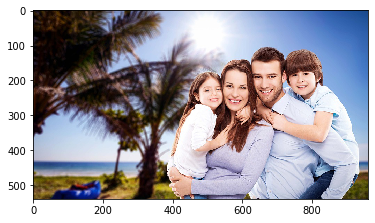

In [8]:
# The name of the image file to annotate
file_name = 'family.jpg'

# Loads the image into memory
with io.open(file_name, 'rb') as image_file:
    content = image_file.read()


img = plt.imread(file_name)
plt.imshow(img)
plt.show()

## Labels

In [9]:
%%time
image = types.Image(content=content)
# Performs label detection on the image file
response = client.label_detection(image=image)
labels = response.label_annotations

CPU times: user 47.7 ms, sys: 11.6 ms, total: 59.2 ms
Wall time: 775 ms


In [10]:
print('Labels:')
for label in labels:
    print(label.description, label.score)

Labels:
People in nature 0.9788440465927124
Photograph 0.9582339525222778
People 0.9515836238861084
Fun 0.901314914226532
Friendship 0.8939360976219177
Happy 0.845870316028595
Leisure 0.8444693088531494
Smile 0.8202158212661743
Vacation 0.7932780385017395
Photography 0.7876507043838501


## Object

In [16]:
response = client.object_localization(image=image)

In [21]:
objects = response.localized_object_annotations

In [22]:
len(objects)

4

In [30]:
for obj in objects:
    print(obj.name, obj.score)

Person 0.8675968050956726
Person 0.8316656351089478
Top 0.6671833395957947
Top 0.5593595504760742


In [29]:
objects[0].score

0.8675968050956726

## Face

In [13]:
%%time
image = types.Image(content=content)
response = client.face_detection(image=image)
faces = response.face_annotations  

CPU times: user 3.67 ms, sys: 2.44 ms, total: 6.11 ms
Wall time: 2.13 s


In [31]:
len(faces)

4

In [15]:
# Names of likelihood from google.cloud.vision.enums
likelihood_name = ('UNKNOWN', 'VERY_UNLIKELY', 'UNLIKELY', 'POSSIBLE',
                       'LIKELY', 'VERY_LIKELY')

print("There are {} faces".format(len(faces)))

print('Faces:')
for face in faces:
    print('anger: {}'.format(likelihood_name[face.anger_likelihood]))
    print('joy: {}'.format(likelihood_name[face.joy_likelihood]))
    print('surprise: {}'.format(likelihood_name[face.surprise_likelihood]))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                for vertex in face.bounding_poly.vertices])

    print('face bounds: {}'.format(','.join(vertices)))

There are 4 faces
Faces:
anger: VERY_UNLIKELY
joy: VERY_LIKELY
surprise: VERY_UNLIKELY
face bounds: (519,145),(643,145),(643,288),(519,288)
anger: VERY_UNLIKELY
joy: VERY_LIKELY
surprise: VERY_UNLIKELY
face bounds: (606,112),(736,112),(736,263),(606,263)
anger: VERY_UNLIKELY
joy: VERY_LIKELY
surprise: VERY_UNLIKELY
face bounds: (720,129),(828,129),(828,255),(720,255)
anger: VERY_UNLIKELY
joy: VERY_LIKELY
surprise: VERY_UNLIKELY
face bounds: (465,185),(555,185),(555,289),(465,289)
